In [1]:
#!pip install fuzzywuzzy

In [2]:
import pandas as pd
import numpy as np
import fuzzywuzzy as fuzzy

In [3]:
nadac = pd.read_csv('data/nadac_no_repeats.csv')
ndc = pd.read_csv('data/ndc_df.csv')

In [4]:
nadac.head()

,Unnamed: 0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,152,OLANZAPINE ODT 20 MG TABLET,65862065903,4.12341,12/23/2015,EA,C/I,N,1,G,NaN,NaN,12/30/2015
1,213,"NYSTATIN 100,000 UNIT/GM POWD",904645602,0.60225,12/23/2015,GM,C/I,N,"1, 5",G,NaN,NaN,12/30/2015
2,298,OLANZAPINE 10 MG TABLET,904637661,0.22020,12/23/2015,EA,C/I,N,1,G,NaN,NaN,12/30/2015
3,575,CELECOXIB 50 MG CAPSULE,13811065860,0.51850,11/11/2015,EA,C/I,N,4,G,NaN,NaN,12/30/2015
4,1168,LISINOPRIL 20 MG TABLET,51079098319,0.02633,12/17/2014,EA,C/I,N,1,G,NaN,NaN,12/31/2014


In [5]:
nadac.columns

Index(['Unnamed: 0', 'NDC Description', 'NDC', 'NADAC_Per_Unit',
       'Effective_Date', 'Pricing_Unit', 'Pharmacy_Type_Indicator', 'OTC',
       'Explanation_Code', 'Classification_for_Rate_Setting',
       'Corresponding_Generic_Drug_NADAC_Per_Unit',
       'Corresponding_Generic_Drug_Effective_Date', 'As of Date'],
      dtype='object')

In [6]:
nadac.dtypes

Unnamed: 0                                     int64
NDC Description                               object
NDC                                            int64
NADAC_Per_Unit                               float64
Effective_Date                                object
Pricing_Unit                                  object
Pharmacy_Type_Indicator                       object
OTC                                           object
Explanation_Code                              object
Classification_for_Rate_Setting               object
Corresponding_Generic_Drug_NADAC_Per_Unit    float64
Corresponding_Generic_Drug_Effective_Date     object
As of Date                                    object
dtype: object

In [7]:
nadac['NDC'].value_counts().unique

<bound method Series.unique of 68016025594    1
378141877      1
54418625       1
228306111      1
27241004221    1
              ..
603388522      1
65862047505    1
65862029935    1
173076100      1
115148801      1
Name: NDC, Length: 43222, dtype: int64>

In [8]:
nadac.shape

(43222, 13)

In [9]:
nadac_ndc = list(nadac['NDC'].unique())
print(f'Unique number of NDCs in the NADAC dataframe: {len(nadac_ndc)}')

Unique number of NDCs in the NADAC dataframe: 43222


In [10]:
ndc.columns

Index(['Unnamed: 0', 'marketing_start_date', 'product_type', 'product_id',
       'marketing_category', 'route', 'generic_name', 'openfda', 'brand_name',
       'brand_name_base', 'labeler_name', 'packaging', 'active_ingredients',
       'product_ndc', 'finished', 'spl_id', 'application_number',
       'listing_expiration_date', 'dosage_form', 'pharm_class',
       'brand_name_suffix', 'marketing_end_date', 'dea_schedule'],
      dtype='object')

In [11]:
ndc['product_ndc'].value_counts().unique

<bound method Series.unique of 47682-098     1
70000-0035    1
71450-0003    1
48951-4150    1
78872-005     1
             ..
0025-1515     1
0591-3692     1
0409-7120     1
0220-3413     1
55714-9011    1
Name: product_ndc, Length: 128522, dtype: int64>

In [12]:
ndc_ndc = list(ndc['product_ndc'].unique())
print(f'Unique number of NDCs in the NDC dataframe: {len(ndc_ndc)}')

Unique number of NDCs in the NDC dataframe: 128522


In [15]:
%%time
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from collections import defaultdict


ndc_matches = {}
for nadac_num in nadac_ndc:
    for ndc_num in ndc_ndc:
        score = fuzz.token_sort_ratio(nadac_num, ndc_num)
        if score > 85:
            ndc_matches[nadac_num] = ndc_num
        else:
            continue

C:\Users\12155\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


KeyboardInterrupt: 

In [18]:
len(ndc_matches.keys())

198

In [21]:
#ndc_matches
nadac.shape

(43222, 13)

In [22]:
ndc.shape

(128522, 23)

In [23]:
#Only got 198 matches after running for over 24 hours - need to find a faster way!

In [26]:
ndc_matches.keys()

dict_keys([60505026101, 59762673007, 378408501, 59762673207, 55111061010, 60505026201, 904649035, 59762672007, 51672529701, 59762673107, 378087316, 13811068210, 59762672107, 60505317007, 51672529601, 10147076100, 40085020190, 10147078100, 59762672207, 59762369002, 378008701, 51672528107, 60505261606, 51672135302, 172365000, 60505700602, 378001801, 11523716001, 60505362009, 59762306002, 378008501, 60505276105, 51525590101, 11523433203, 11523716003, 8121130, 11523432501, 60505700900, 60505700200, 59762673301, 76329826101, 904762331, 11523432701, 59762669103, 59762600201, 6007131, 60505376009, 259477040, 11523131402, 11523721402, 60505700800, 59762669203, 15127055108, 60505602102, 11523715802, 11523170201, 51672125301, 60505700802, 11523726803, 11523414002, 11523116703, 11523178301, 51672527604, 378087216, 3142811, 60505700902, 51672527803, 60505264101, 378018410, 60505700600, 172541060, 378628001, 11523723708, 378018401, 59762671101, 11523432803, 51672527804, 13925050910, 378008401, 5556

In [27]:
nadac[nadac['NDC'] == 60505026101]

,Unnamed: 0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
133,108671,BENAZEPRIL-HYDROCHLOROTHIAZIDE 5-6.25 MG TAB,60505026101,1.48708,07/22/2015,EA,C/I,N,4,G,NaN,NaN,12/30/2015


In [28]:
ndc_matches[60505026101]

'60505-6101'

In [32]:
ndc.columns

Index(['Unnamed: 0', 'marketing_start_date', 'product_type', 'product_id',
       'marketing_category', 'route', 'generic_name', 'openfda', 'brand_name',
       'brand_name_base', 'labeler_name', 'packaging', 'active_ingredients',
       'product_ndc', 'finished', 'spl_id', 'application_number',
       'listing_expiration_date', 'dosage_form', 'pharm_class',
       'brand_name_suffix', 'marketing_end_date', 'dea_schedule'],
      dtype='object')

In [36]:
ndc[ndc['product_ndc']=='60505-6101']

,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
47121,48207,20170717,HUMAN PRESCRIPTION DRUG,60505-6101_e1032ac4-affd-767b-4960-b26ecbaab80f,ANDA,['INTRAVENOUS'],bivalirudin,{'spl_set_id': ['3319d1ad-acaa-37dd-94cf-9c141...,Bivalirudin,Bivalirudin,...,60505-6101,True,e1032ac4-affd-767b-4960-b26ecbaab80f,ANDA204876,NaN,"INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","['Anti-coagulant [EPC]', 'Direct Thrombin Inhi...",NaN,20210301.0,NaN


In [37]:
nadac[nadac['NDC'] == 59762673007]

,Unnamed: 0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
503,147609,AMLODIPINE-ATORVAST 10-10 MG,59762673007,3.58298,12/23/2015,EA,C/I,N,"1, 6",G,NaN,NaN,12/30/2015


In [38]:
ndc_matches[59762673007]

'59762-6730'

In [39]:
ndc[ndc['product_ndc']== '59762-6730' ]

,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
98479,100799,20140404,HUMAN PRESCRIPTION DRUG,59762-6730_97aad811-2166-4af3-b137-5938d16a3c29,NDA AUTHORIZED GENERIC,['ORAL'],amlodipine besylate and atorvastatin calcium,"{'manufacturer_name': ['Greenstone LLC'], 'uni...",Amlodipine besylate and Atorvastatin calcium,Amlodipine besylate and Atorvastatin calcium,...,59762-6730,True,97aad811-2166-4af3-b137-5938d16a3c29,NDA021540,20211231.0,"TABLET, FILM COATED","['Calcium Channel Antagonists [MoA]', 'Dihydro...",NaN,NaN,NaN


In [52]:
def check_match(key):
    print(nadac[nadac['NDC'] == key]['NDC Description'])
    num = ndc_matches[key]
    print(ndc[ndc['product_ndc']== num ]['generic_name'])
    return ndc[ndc['product_ndc']== num ]

In [53]:
ndc_matches.keys()

dict_keys([60505026101, 59762673007, 378408501, 59762673207, 55111061010, 60505026201, 904649035, 59762672007, 51672529701, 59762673107, 378087316, 13811068210, 59762672107, 60505317007, 51672529601, 10147076100, 40085020190, 10147078100, 59762672207, 59762369002, 378008701, 51672528107, 60505261606, 51672135302, 172365000, 60505700602, 378001801, 11523716001, 60505362009, 59762306002, 378008501, 60505276105, 51525590101, 11523433203, 11523716003, 8121130, 11523432501, 60505700900, 60505700200, 59762673301, 76329826101, 904762331, 11523432701, 59762669103, 59762600201, 6007131, 60505376009, 259477040, 11523131402, 11523721402, 60505700800, 59762669203, 15127055108, 60505602102, 11523715802, 11523170201, 51672125301, 60505700802, 11523726803, 11523414002, 11523116703, 11523178301, 51672527604, 378087216, 3142811, 60505700902, 51672527803, 60505264101, 378018410, 60505700600, 172541060, 378628001, 11523723708, 378018401, 59762671101, 11523432803, 51672527804, 13925050910, 378008401, 5556

In [56]:
check_match(60505026101)
#Does not match

133    BENAZEPRIL-HYDROCHLOROTHIAZIDE 5-6.25 MG TAB
Name: NDC Description, dtype: object
47121    bivalirudin
Name: generic_name, dtype: object


,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
47121,48207,20170717,HUMAN PRESCRIPTION DRUG,60505-6101_e1032ac4-affd-767b-4960-b26ecbaab80f,ANDA,['INTRAVENOUS'],bivalirudin,{'spl_set_id': ['3319d1ad-acaa-37dd-94cf-9c141...,Bivalirudin,Bivalirudin,...,60505-6101,True,e1032ac4-affd-767b-4960-b26ecbaab80f,ANDA204876,NaN,"INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","['Anti-coagulant [EPC]', 'Direct Thrombin Inhi...",NaN,20210301.0,NaN


In [57]:
check_match(59762673007)
#Matches! :)

503    AMLODIPINE-ATORVAST 10-10 MG
Name: NDC Description, dtype: object
98479    amlodipine besylate and atorvastatin calcium
Name: generic_name, dtype: object


,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
98479,100799,20140404,HUMAN PRESCRIPTION DRUG,59762-6730_97aad811-2166-4af3-b137-5938d16a3c29,NDA AUTHORIZED GENERIC,['ORAL'],amlodipine besylate and atorvastatin calcium,"{'manufacturer_name': ['Greenstone LLC'], 'uni...",Amlodipine besylate and Atorvastatin calcium,Amlodipine besylate and Atorvastatin calcium,...,59762-6730,True,97aad811-2166-4af3-b137-5938d16a3c29,NDA021540,20211231.0,"TABLET, FILM COATED","['Calcium Channel Antagonists [MoA]', 'Dihydro...",NaN,NaN,NaN


In [54]:
check_match(378408501)
#Does not match - ADHD med and nausea relief

587    DEXMETHYLPHENIDATE ER 40 MG CP
Name: NDC Description, dtype: object
4876    Dextrose (glucose), Levulose (fructose), Phosp...
Name: generic_name, dtype: object


,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
4876,5023,20141104,HUMAN OTC DRUG,37808-501_f8185acc-bd46-4832-8cc4-9eee48fa58e5,UNAPPROVED DRUG OTHER,['ORAL'],"Dextrose (glucose), Levulose (fructose), Phosp...",{'spl_set_id': ['8ecf4cba-a5fb-48f1-a590-1bb3f...,nausea relief,nausea relief,...,37808-501,True,f8185acc-bd46-4832-8cc4-9eee48fa58e5,NaN,20201231.0,SOLUTION,NaN,NaN,NaN,NaN


In [58]:
check_match(59762673207)
#matches

700    AMLODIPINE-ATORVAST 10-40 MG
Name: NDC Description, dtype: object
124007    amlodipine besylate and atorvastatin calcium
Name: generic_name, dtype: object


,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
124007,126930,20140404,HUMAN PRESCRIPTION DRUG,59762-6732_97aad811-2166-4af3-b137-5938d16a3c29,NDA AUTHORIZED GENERIC,['ORAL'],amlodipine besylate and atorvastatin calcium,"{'manufacturer_name': ['Greenstone LLC'], 'uni...",Amlodipine besylate and Atorvastatin calcium,Amlodipine besylate and Atorvastatin calcium,...,59762-6732,True,97aad811-2166-4af3-b137-5938d16a3c29,NDA021540,20211231.0,"TABLET, FILM COATED","['Calcium Channel Antagonists [MoA]', 'Dihydro...",NaN,NaN,NaN


In [59]:
check_match(55111061010)
#Does not match - SSRI, hand sanitizer

730    DULOXETINE HCL DR 60 MG CAP
Name: NDC Description, dtype: object
8600    alcohol
Name: generic_name, dtype: object


,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
8600,8772,20130807,HUMAN OTC DRUG,61010-5111_d6138e2e-98eb-4fc7-bea2-600dcc8a4f57,OTC MONOGRAPH NOT FINAL,['TOPICAL'],alcohol,{'spl_set_id': ['f9e30645-491b-4f54-acfd-f863e...,Instant Hand Sanitizer,Instant Hand Sanitizer,...,61010-5111,True,d6138e2e-98eb-4fc7-bea2-600dcc8a4f57,part333E,20201231.0,GEL,NaN,NaN,NaN,NaN


In [60]:
check_match(60505026201)
#does not match

870    BENAZEPRIL-HYDROCHLOROTHIAZIDE 10-12.5 MG TAB
Name: NDC Description, dtype: object
47126    Fluticasone Propionate
Name: generic_name, dtype: object


,Unnamed: 0,marketing_start_date,product_type,product_id,marketing_category,route,generic_name,openfda,brand_name,brand_name_base,...,product_ndc,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
47126,48212,20180418,HUMAN OTC DRUG,60505-6201_33fa046f-8e66-75e1-7541-5cfd910f72d4,ANDA,['NASAL'],Fluticasone Propionate,{'spl_set_id': ['bfbb8f99-943d-a2a1-53c0-de81f...,Fluticasone Propionate,Fluticasone Propionate,...,60505-6201,True,33fa046f-8e66-75e1-7541-5cfd910f72d4,ANDA208150,20201231.0,"SPRAY, METERED",NaN,NaN,NaN,NaN


In [62]:
#They do not match very well
#I am going to increase the matching score to 90
#Append once something is added and move on
#Print statements
#Will start this in a second notebook, but keep this one to push for check-in 3

In [63]:
nadac['ndc_code'] = nadac['NDC'].map(ndc_matches)
nadac.head()

,Unnamed: 0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,ndc_code
0,152,OLANZAPINE ODT 20 MG TABLET,65862065903,4.12341,12/23/2015,EA,C/I,N,1,G,NaN,NaN,12/30/2015,NaN
1,213,"NYSTATIN 100,000 UNIT/GM POWD",904645602,0.60225,12/23/2015,GM,C/I,N,"1, 5",G,NaN,NaN,12/30/2015,NaN
2,298,OLANZAPINE 10 MG TABLET,904637661,0.22020,12/23/2015,EA,C/I,N,1,G,NaN,NaN,12/30/2015,NaN
3,575,CELECOXIB 50 MG CAPSULE,13811065860,0.51850,11/11/2015,EA,C/I,N,4,G,NaN,NaN,12/30/2015,NaN
4,1168,LISINOPRIL 20 MG TABLET,51079098319,0.02633,12/17/2014,EA,C/I,N,1,G,NaN,NaN,12/31/2014,NaN


In [65]:
nadac.notnull().sum()

Unnamed: 0                                   43222
NDC Description                              43222
NDC                                          43222
NADAC_Per_Unit                               43222
Effective_Date                               43222
Pricing_Unit                                 43222
Pharmacy_Type_Indicator                      43222
OTC                                          43222
Explanation_Code                             43222
Classification_for_Rate_Setting              43222
Corresponding_Generic_Drug_NADAC_Per_Unit     1961
Corresponding_Generic_Drug_Effective_Date     1961
As of Date                                   43222
ndc_code                                       198
dtype: int64

In [67]:
ndc.columns

Index(['Unnamed: 0', 'marketing_start_date', 'product_type', 'product_id',
       'marketing_category', 'route', 'generic_name', 'openfda', 'brand_name',
       'brand_name_base', 'labeler_name', 'packaging', 'active_ingredients',
       'product_ndc', 'finished', 'spl_id', 'application_number',
       'listing_expiration_date', 'dosage_form', 'pharm_class',
       'brand_name_suffix', 'marketing_end_date', 'dea_schedule'],
      dtype='object')

In [68]:
ndc.rename(columns={'product_ndc':'ndc_code'}, inplace=True)

In [69]:
nadac_ndc = pd.merge(nadac, ndc, on=['ndc_code'] )

In [70]:
nadac_ndc.head()

,Unnamed: 0_x,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,active_ingredients,finished,spl_id,application_number,listing_expiration_date,dosage_form,pharm_class,brand_name_suffix,marketing_end_date,dea_schedule
0,108671,BENAZEPRIL-HYDROCHLOROTHIAZIDE 5-6.25 MG TAB,60505026101,1.48708,07/22/2015,EA,C/I,N,4,G,...,"[{'strength': '250 mg/1', 'name': 'BIVALIRUDIN'}]",True,e1032ac4-affd-767b-4960-b26ecbaab80f,ANDA204876,NaN,"INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","['Anti-coagulant [EPC]', 'Direct Thrombin Inhi...",NaN,20210301.0,NaN
1,1217978,HYDROCHLOROTHIAZIDE 50 MG TAB,60505264101,0.03750,12/17/2014,EA,C/I,N,1,G,...,"[{'strength': '250 mg/1', 'name': 'BIVALIRUDIN'}]",True,e1032ac4-affd-767b-4960-b26ecbaab80f,ANDA204876,NaN,"INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","['Anti-coagulant [EPC]', 'Direct Thrombin Inhi...",NaN,20210301.0,NaN
2,147609,AMLODIPINE-ATORVAST 10-10 MG,59762673007,3.58298,12/23/2015,EA,C/I,N,"1, 6",G,...,"[{'strength': '10 mg/1', 'name': 'AMLODIPINE B...",True,97aad811-2166-4af3-b137-5938d16a3c29,NDA021540,20211231.0,"TABLET, FILM COATED","['Calcium Channel Antagonists [MoA]', 'Dihydro...",NaN,NaN,NaN
3,2168723,AMLODIPINE-ATORVAST 10-10 MG,59762673005,3.86789,12/17/2014,EA,C/I,N,"1, 6",G,...,"[{'strength': '10 mg/1', 'name': 'AMLODIPINE B...",True,97aad811-2166-4af3-b137-5938d16a3c29,NDA021540,20211231.0,"TABLET, FILM COATED","['Calcium Channel Antagonists [MoA]', 'Dihydro...",NaN,NaN,NaN
4,156279,DEXMETHYLPHENIDATE ER 40 MG CP,378408501,6.18075,12/23/2015,EA,C/I,N,1,G,...,"[{'strength': '1.87 g/5mL', 'name': 'DEXTROSE'...",True,f8185acc-bd46-4832-8cc4-9eee48fa58e5,NaN,20201231.0,SOLUTION,NaN,NaN,NaN,NaN


In [71]:
nadac_ndc.notnull().sum()

Unnamed: 0_x                                 198
NDC Description                              198
NDC                                          198
NADAC_Per_Unit                               198
Effective_Date                               198
Pricing_Unit                                 198
Pharmacy_Type_Indicator                      198
OTC                                          198
Explanation_Code                             198
Classification_for_Rate_Setting              198
Corresponding_Generic_Drug_NADAC_Per_Unit     36
Corresponding_Generic_Drug_Effective_Date     36
As of Date                                   198
ndc_code                                     198
Unnamed: 0_y                                 198
marketing_start_date                         198
product_type                                 198
product_id                                   198
marketing_category                           198
route                                        186
generic_name        

In [76]:
nadac_ndc.shape

(198, 36)

In [77]:
nadac.fillna(0, inplace = True)

In [78]:
nadac.dtypes

Unnamed: 0                                     int64
NDC Description                               object
NDC                                            int64
NADAC_Per_Unit                               float64
Effective_Date                                object
Pricing_Unit                                  object
Pharmacy_Type_Indicator                       object
OTC                                           object
Explanation_Code                              object
Classification_for_Rate_Setting               object
Corresponding_Generic_Drug_NADAC_Per_Unit    float64
Corresponding_Generic_Drug_Effective_Date     object
As of Date                                    object
ndc_code                                      object
dtype: object

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_dummies = pd.get_dummies(data = nadac_ndc, columns = ['NDC Description', 'NDC', 'Effective_Date', 'Pricing_Unit', 'Pharmacy_Type_Indicator', 'OTC',
       'Explanation_Code', 'Classification_for_Rate_Setting','Corresponding_Generic_Drug_NADAC_Per_Unit','Corresponding_Generic_Drug_Effective_Date', 'As of Date',
       'marketing_start_date', 'product_type', 'product_id','marketing_category', 'route', 'generic_name', 'openfda', 'brand_name',
       'brand_name_base', 'labeler_name', 'packaging', 'active_ingredients','finished', 'spl_id', 'application_number', 'listing_expiration_date',
       'dosage_form', 'pharm_class', 'brand_name_suffix', 'marketing_end_date',
       'dea_schedule'], drop_first=True)

#Get Dummies
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=17)
#linear regression

In [107]:
X_dummies.drop(columns = [#"Unnamed: 0_x", "Unnamed: 0_y",
    "ndc_code"], inplace=True)
X_dummies

,NADAC_Per_Unit,NDC Description_A+D ZINC OXIDE CREAM,NDC Description_AFRIN 0.05% NASAL SPRAY,NDC Description_AFRIN NO DRIP ORIG PUMP MIST,NDC Description_AFRIN NO DRIP PUMP MIST,NDC Description_AFRIN NO DRIP SINUS PUMP MIST,NDC Description_ALPRAZOLAM 1 MG ODT,NDC Description_AMLODIPINE-ATORVAST 10-10 MG,NDC Description_AMLODIPINE-ATORVAST 10-20 MG,NDC Description_AMLODIPINE-ATORVAST 10-40 MG,...,brand_name_suffix_Original Pump Mist,brand_name_suffix_Reditabs,brand_name_suffix_SPF 18,brand_name_suffix_Severe Congestion,brand_name_suffix_Stick SPF 50,marketing_end_date_20210228.0,marketing_end_date_20210301.0,marketing_end_date_20210901.0,marketing_end_date_20220430.0,dea_schedule_CIV
0,1.48708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.03750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3.58298,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.86789,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.18075,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.20167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,1.98249,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,1.39983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,16.44586,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
X_dummies.drop(columns='NADAC_Per_Unit', inplace=True)

In [110]:
X_dummies

,NDC Description_A+D ZINC OXIDE CREAM,NDC Description_AFRIN 0.05% NASAL SPRAY,NDC Description_AFRIN NO DRIP ORIG PUMP MIST,NDC Description_AFRIN NO DRIP PUMP MIST,NDC Description_AFRIN NO DRIP SINUS PUMP MIST,NDC Description_ALPRAZOLAM 1 MG ODT,NDC Description_AMLODIPINE-ATORVAST 10-10 MG,NDC Description_AMLODIPINE-ATORVAST 10-20 MG,NDC Description_AMLODIPINE-ATORVAST 10-40 MG,NDC Description_AMLODIPINE-ATORVAST 10-80 MG,...,brand_name_suffix_Original Pump Mist,brand_name_suffix_Reditabs,brand_name_suffix_SPF 18,brand_name_suffix_Severe Congestion,brand_name_suffix_Stick SPF 50,marketing_end_date_20210228.0,marketing_end_date_20210301.0,marketing_end_date_20210901.0,marketing_end_date_20220430.0,dea_schedule_CIV
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X = X_dummies
y = nadac_ndc['NADAC_Per_Unit']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 17)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
lr.score(X_test, y_test)
#This does not look good - a really low/ negative R2 score!

-17.358151021178134

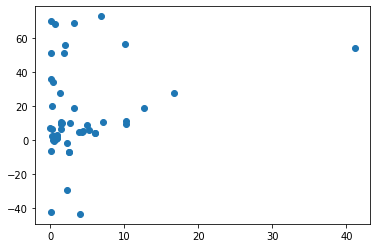

In [120]:
import matplotlib.pyplot as plt
preds = lr.predict(X_test)
plt.scatter(y_test, preds);

In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds, squared=False)
#$27.57 off on average - this is not great

27.56991307479397